In [1]:
import os, sys
project_dir = os.path.join(os.getcwd(),'../..')
if project_dir not in sys.path:
    sys.path.append(project_dir)

hyspeclab_dir = os.path.join(project_dir, 'HySpecLab')
if hyspeclab_dir not in sys.path:
    sys.path.append(hyspeclab_dir)

ipdl_dir = os.path.join(project_dir, 'modules/IPDL')
if ipdl_dir not in sys.path:
    sys.path.append(ipdl_dir)    

from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import config

from HySpecLab.utils import HyperSpectralCalibration as calibration

In [2]:
from scipy.io import loadmat
mat = loadmat(os.path.join(config.DERMA_DATASET_DIR, 'train/P32_C1000.mat'))
X = mat['preProcessedImage'].astype(np.float64)
tiny_X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [3]:
from HySpecLab.transform import Norm1Transform, StandarizedTransform

transform = Norm1Transform()
# transform = StandarizedTransform()
tiny_X = transform.fit_transform(tiny_X)
X = tiny_X.reshape(X.shape)

In [4]:
from pysptools import eea

ee = eea.NFINDR()
U = ee.extract(X, 3, maxit=128, normalize=False,ATGP_init=True)

In [5]:
U.shape

(3, 116)

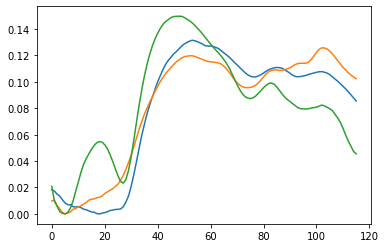

In [6]:
plt.plot(U.T)
plt.show()

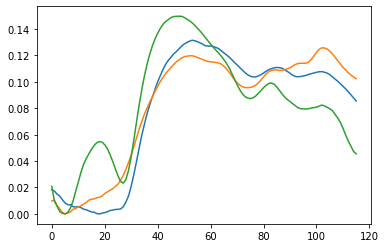

In [7]:
plt.plot(U.T)
plt.show()

In [8]:
import pysptools.abundance_maps as amap

am = amap.FCLS() #define am object using the amap 
amaps = am.map(X,U,normalize=False) #create abundance maps for the HSI cubems

(3, 116)
(50, 50, 3)


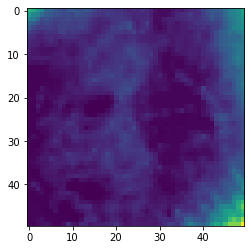

In [9]:
print(U.shape)
print(amaps.shape)

import torch 

U_tensor = torch.tensor(U)
amaps_tensor = torch.tensor(amaps)

result = torch.matmul(U_tensor.T, amaps_tensor.T.flatten(start_dim=1)).reshape(116, 50, 50)

# amaps_tensor.T.shape
plt.imshow(result[10].T)

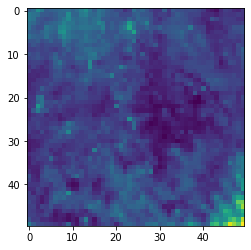

In [10]:
plt.imshow(X[:,:,10])

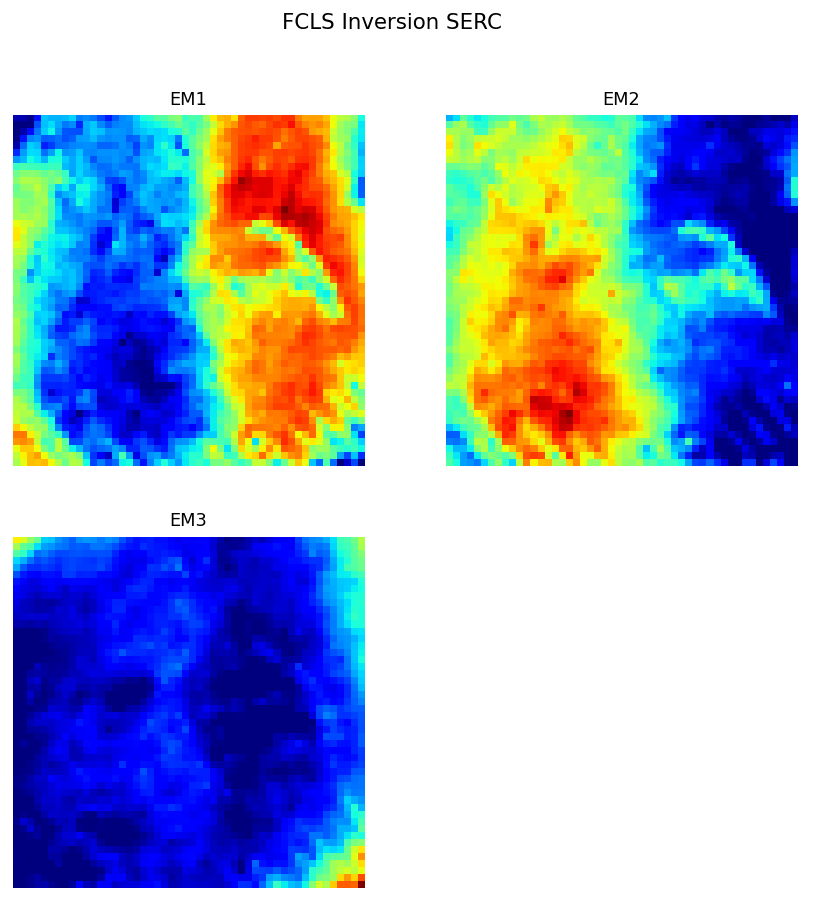

<Figure size 432x288 with 0 Axes>

In [11]:
am.display(colorMap='jet',columns=2,suffix='SERC')
plt.show()

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
# print('EM4:',np.mean(amaps[:,:,3]))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,0.001]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,0.5]) 

# ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
# amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,0.05]) 

In [ ]:
import pysptools.classification as cls

def SID(data,E,thrs=None):
    sid = cls.SID()
    cmap = sid.classify(data,E,threshold=thrs)
    return cmap
    # sid.display(colorMap='tab20b',suffix='SERC')

In [ ]:
U2 = U[[0,2],:]
# cmap = SID(X, U2, [0.9, 0.9])
cmap = SID(X, U2, 0.75)


In [ ]:
plt.imshow(cmap)